# Confusion Matrix

當我們用測試集(testing set)或驗證集(validation set)去評估一個模型，我們應該如何去評估該模型的好壞，首先我們一定會需要量化的指標(Metrics)，並且這些指標要能指出模型表現得好的部分與不好的部分。

如果稍微查一下，會發現機器學習中指標有千千萬萬種，一大堆名詞讓人摸不著頭腦，這是因為不同的任務往往需要不同的指標，今天要來講解二元分類(classification)任務中最常用的指標，Confusion matrix。

先來看看Confusion matrix的圖

<img src="pics/confusion matrix.png" alt="confusion matrix" style="width: 700px">

舉個例子

舉個二元分類的問題，如果今天去檢測糖尿病，有A，B兩位病患，A有糖尿病而B沒有糖尿病。

如果糖尿病檢測結果為A有糖尿病，此結果為TP，若檢測出B有糖尿病，此結果則為FP(type I error)，若檢測出A無糖尿病，此結果為FN(Type II error)，若檢測出B無糖尿病，則為TN。

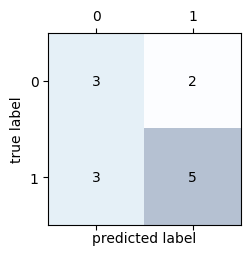

In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_true = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0 ,1]
y_pred = [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1 ,1]

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

混淆矩陣的概念衍生出很多常用的指標


**Accuracy**

Accuracy為非常常用的Metric

算法為

<img src="pics/acc.png" alt="acc" style="width: 500px">

其代表的意義就是不論是case true 或 case false，只要被正確預測的即可。

Accuracy雖然常常出現，但是在某些情況下會失效。

例如信用卡盜刷的偵測，真實消費紀錄和真正被盜刷的紀錄比起來多非常非常多，假設今天偵測到盜刷定義為1，真實消費為0，一萬筆消費中有十筆為盜刷，那我們要如何讓模型表現出高Accuracy？只要讓預測結果全部為0即可，根據這例子算出來的Accuracy為99.9%。

因此在case true或 case false非常不平衡的情況下，Accuracy是不具參考性，因此我們需要其他的指標。

**Precision**

來看看他的算法

<img src="pics/precision.png" alt="precision" style="width: 400px">

該指標著重在case true的正確預測，也就是所有預測為true的結果中，預測正確的比例為何。舉上面信用卡的例子，如果全部預測為0，則Precision為0，高Precision代表的意義則是如果今天預測為結果為正，那我希望判定的結果是要非常肯定的，不能錯放，也就是寧可錯放，不能錯殺。

例如信用卡盜刷總共預測只預測出三筆盜刷，而那三筆皆為正確，該預測結果的Precision則為100%，也就是Precision越高，模型越嚴謹。


**Recall**

<img src="pics/recall.png" alt="recall" style="width: 400px">

Recall是在所有True case中，被預測為positive的比例，也可以看成所有要抓取出的目標，究竟抓了多少回來，因此才會被稱為Recall(召回率)，高Recall代表的是，可以讓抓取到錯誤結果，但是不願意放走一個，也就是寧可錯殺，不能錯放。

在信用卡的例子中，如果全部預測結果為0，則Recall為0，若今天預測出100筆盜刷，其中包含了10筆真正盜刷的紀錄，則Recall則為100%。

Precision和Recall都不去考慮True Negative

因為通常True Negative會是Null Hypothesis，簡單講就是最無聊的正確結果。在門禁的解鎖問題就是陌生人按壓且門不開；在廣告投放的例子中就是廣告不投，結果那個人也不是潛在客戶：在信用卡盜刷的例子，機器人認為正常的刷卡紀錄，其實也正是正常的。在通常的命題之下，實際是正向的結果是比負向少的，理所當然預測正向的結果也要比負向少，所以True Negative通常是量最多的，也是最無聊的。

Recall和Precision在現實中很難兼顧，所以選出適合的指標是非常重要的，下列的任務中應該適合使用哪些指標。

1. 臉部辨識門禁

2. 廣告投放

3. 醫學檢查

在一些情況下我們很需要兩者兼具，例如鏡頭自動搜尋人臉，如果Precision很高Recall太低，團體照中找到的人臉可能寥寥無幾，如果Recall高而Precision低，則可能三個人找出六張臉，兩個模型都不好，因此有了**F1-score**這個指標。

<img src="pics/F1.png" alt="F1" style="width: 400px">

如果今天我覺得Precision和Recall都同等重要，我想要用一個指標來統合標誌它，這就是F1 Score或稱F1 Measure，它是F Measure的一個特例，
F Measure公式如下

<img src="pics/F measure.png" alt="F measure" style="width: 400px">

當beta=1時就是F1 Measure，代表Precision和Recall都同等重要，那如果我希望多看中一點Precision，那belta
就可以選擇小一點，當belta=0時，F Measure就是Precision；如果我希望多看中一點Recall，那belta就可以選擇大一點，當belta無限大時，F Measure就是Recall。


機器學習中有千千萬萬種指標，線性回歸中的RMSE也是一種指標，如果無法正確掌握指標的特性，那便無法的訓練出正確且有用的模型。